In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/hemilpatel/Desktop/HImani/global_cancer_patients_2015_2024.csv")

In [3]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [5]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [6]:
# Count unique values in specific categorical columns
df[['Cancer_Type', 'Cancer_Stage', 'Gender', 'Country_Region']].nunique()


Cancer_Type        8
Cancer_Stage       5
Gender             3
Country_Region    10
dtype: int64

In [7]:
# Group by country and calculate mean severity score
df.groupby('Country_Region')['Target_Severity_Score'].mean()

Country_Region
Australia    4.946477
Brazil       4.934291
Canada       4.962305
China        4.937570
Germany      4.944063
India        4.945790
Pakistan     4.955905
Russia       4.961126
UK           4.958182
USA          4.966379
Name: Target_Severity_Score, dtype: float64

In [8]:
# Count of patients per cancer type
df['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

In [9]:
# Count of patients per cancer stage
df['Cancer_Stage'].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

In [10]:
# Count of patients by gender
df['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

In [11]:
# Average treatment cost, survival years, and severity by cancer stage
df.groupby('Cancer_Stage')[['Treatment_Cost_USD', 'Survival_Years']].mean()

,Treatment_Cost_USD,Survival_Years
Cancer_Stage,,
Stage 0,52572.589493,5.015199
Stage I,52674.079638,5.012990
Stage II,52082.841258,4.995170
Stage III,52708.197506,5.036311
Stage IV,52302.471041,4.972596


In [12]:
# Average alcohol use, smoking, and obesity level by gender
df.groupby('Gender')[['Alcohol_Use', 'Smoking', 'Obesity_Level']].mean()

,Alcohol_Use,Smoking,Obesity_Level
Gender,,,
Female,4.990113,4.998169,5.004237
Male,5.006877,4.979650,4.977441
Other,5.035993,4.991737,4.991931


In [13]:
# Average treatment cost per year
df.groupby('Year')['Treatment_Cost_USD'].mean()

Year
2015    52319.451022
2016    52534.460695
2017    52475.275126
2018    52771.862176
2019    52458.473704
2020    52329.496771
2021    52420.457548
2022    52452.054220
2023    52115.279315
2024    52796.542251
Name: Treatment_Cost_USD, dtype: float64

/var/folders/k7/l986pfx93rl8446kk42hp2n40000gn/T/ipykernel_39051/3727148867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x ='Cancer_Type', order=df['Cancer_Type'].value_counts().index, palette='Set2')


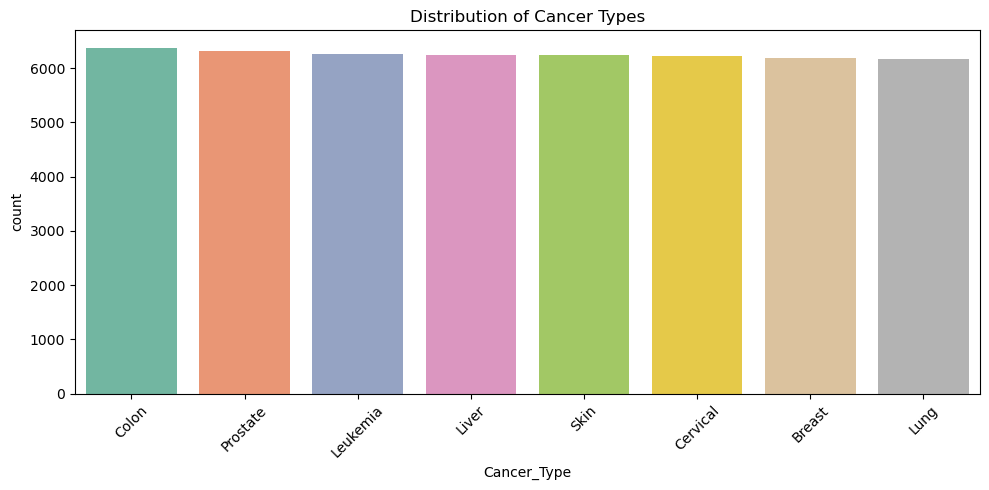

In [14]:
# Bar Chart: Shows the distribution of different cancer types
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x ='Cancer_Type', order=df['Cancer_Type'].value_counts().index, palette='Set2')
plt.title('Distribution of Cancer Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/k7/l986pfx93rl8446kk42hp2n40000gn/T/ipykernel_39051/2512104747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost.index, y=avg_cost.values, palette='coolwarm')


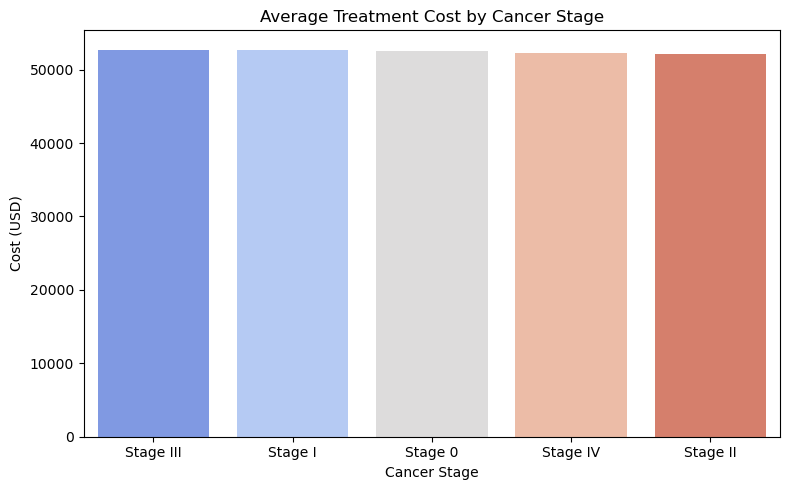

In [15]:
# Bar Chart: Displays the average treatment cost for each cancer stage
avg_cost = df.groupby('Cancer_Stage')['Treatment_Cost_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_cost.index, y=avg_cost.values, palette='coolwarm')
plt.title('Average Treatment Cost by Cancer Stage')
plt.ylabel('Cost (USD)')
plt.xlabel('Cancer Stage')
plt.tight_layout()
plt.show()

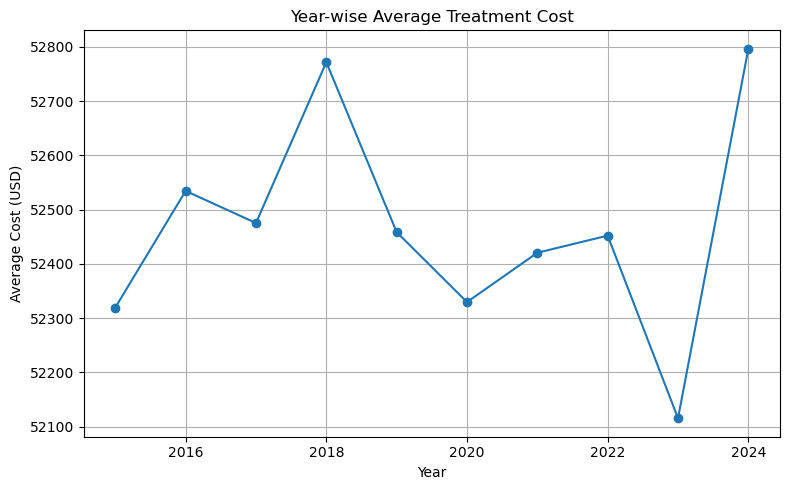

In [16]:
# Line Chart: Shows the trend of average treatment cost across years
yearly_cost = df.groupby('Year')['Treatment_Cost_USD'].mean()

plt.figure(figsize=(8, 5))
plt.plot(yearly_cost.index, yearly_cost.values, marker='o')
plt.title('Year-wise Average Treatment Cost')
plt.xlabel('Year')
plt.ylabel('Average Cost (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


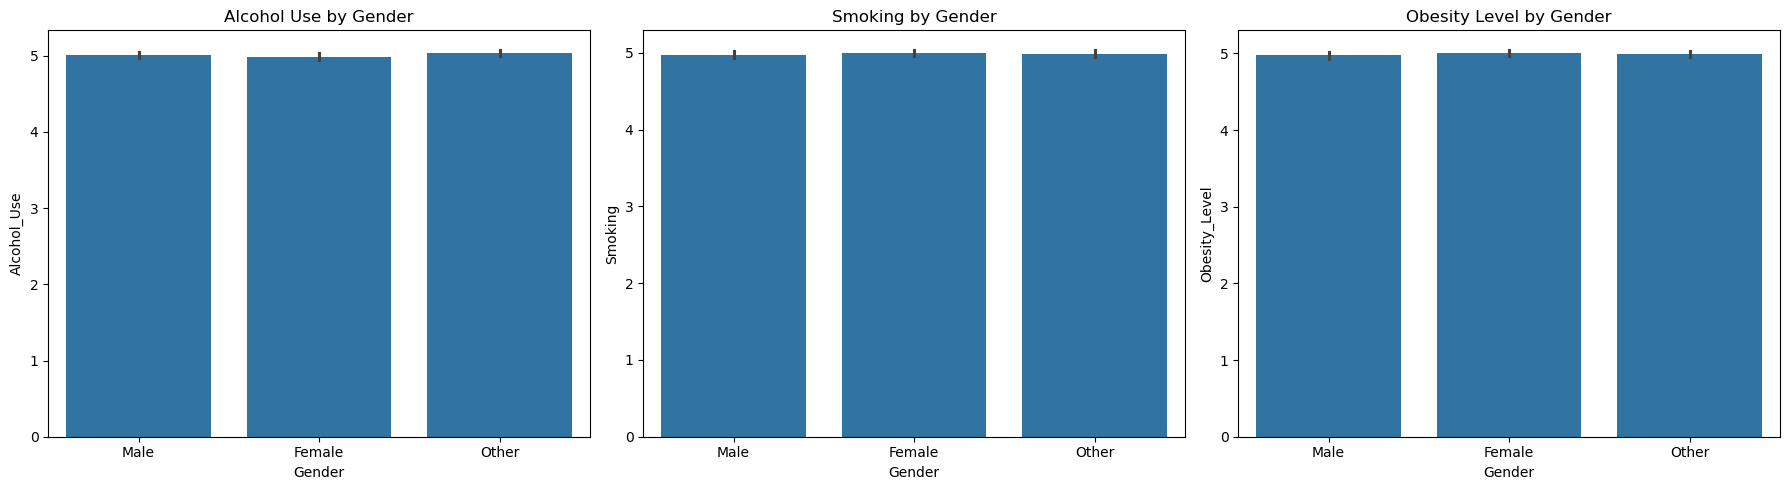

In [17]:
# Subplots: Compare alcohol use, smoking, and obesity level between genders
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x='Gender', y='Alcohol_Use', ax=axes[0])
axes[0].set_title('Alcohol Use by Gender')

sns.barplot(data=df, x='Gender', y='Smoking', ax=axes[1])
axes[1].set_title('Smoking by Gender')

sns.barplot(data=df, x='Gender', y='Obesity_Level', ax=axes[2])
axes[2].set_title('Obesity Level by Gender')

plt.tight_layout()
plt.show()

###DATA VISUALIZATION

## Lung and Breast cancers are the most common types in the dataset.
## Stage III and IV cancers have the highest treatment costs, indicating advanced stages require more intensive care.
## Treatment costs vary year by year, with peaks possibly due to economic or medical factors.
## Males show higher alcohol use and smoking rates compared to females.
## Obesity levels are slightly higher in females.
## Genetic risk and air pollution are strongly correlated with cancer severity scores.
## Country and gender play a role in lifestyle patterns, which may affect treatment and outcomes.